In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage import io

from FF.image_processing import thresh, prepare_scalemap, edgedetector, measure_D
from FF.fractal_generation import midpoint_displacement, mountainpro, mountainpro_enhanced

def plot_image(image):
    plt.figure(figsize=(11, 11))
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Removes the axis labels and ticks
    plt.show()


array([  0, 255], dtype=uint8)

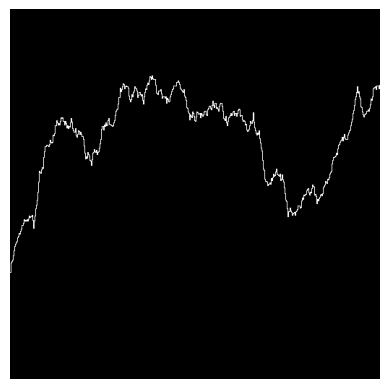

In [22]:
iterations = 9
D = 1.2
P = 1
zslice = 0.5

meshmap = midpoint_displacement(iterations, P = P, D=D)
scalemap = prepare_scalemap(meshmap)
threshmap, bwratio = thresh(scalemap, iterations)

coastline = edgedetector(threshmap, iterations)

slice, trace = mountainpro(scalemap, iterations, zslice)
plt.imshow(trace.astype(np.uint8), 'gray')
plt.axis('off')

min_size=8 
max_size=max(trace.shape) // 10 
num_sizes=50

measure_D(trace, min_size = min_size, max_size=max_size, n_sizes = num_sizes, plot_image=False, invert=False);


tiff_file = '/home/apd/Projects/FractalFluency/datasets/data_dump/test.tif'
imageio.imsave(tiff_file, (trace*255).astype(np.uint8)) 

np.unique(coastline)


In [2]:
# Example usage
batch_generate_fractals(
    num_fractals=100,
    iterations=9,
    D_range=(1.2, 1.8),
    P=1,
    fractal_type = 'coastline',
    output_dir=r'/home/apd/Projects/FractalFluency/datasets/data_dump'
)

Generating Fractals:   0%|          | 0/100 [00:00<?, ?fractal/s]

Generating Fractals: 100%|██████████| 100/100 [01:05<00:00,  1.54fractal/s]

Batch generation complete. 100 fractals saved to /home/apd/Projects/FractalFluency/datasets/data_dump.
Labels saved to /home/apd/Projects/FractalFluency/datasets/data_dump/labels.csv.


In [17]:
min_size=8 
max_size=max(trace.shape) // 10 
num_sizes=50

measure_D(trace, min_size = min_size, max_size=max_size, n_sizes = num_sizes, invert=False);


#save_path = r'C:\Users\absolute-zero\Desktop'
#fname = r'test_coastline_BW'
#box_counter.save_as_tif(threshmap, save_path, fname)

D-value: 1.266


array([0, 1], dtype=uint8)

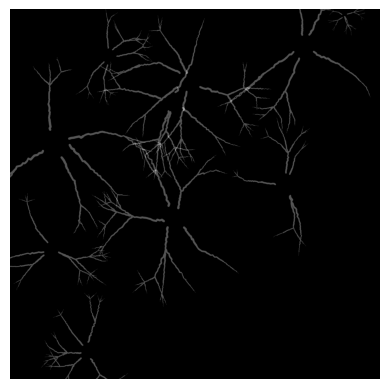

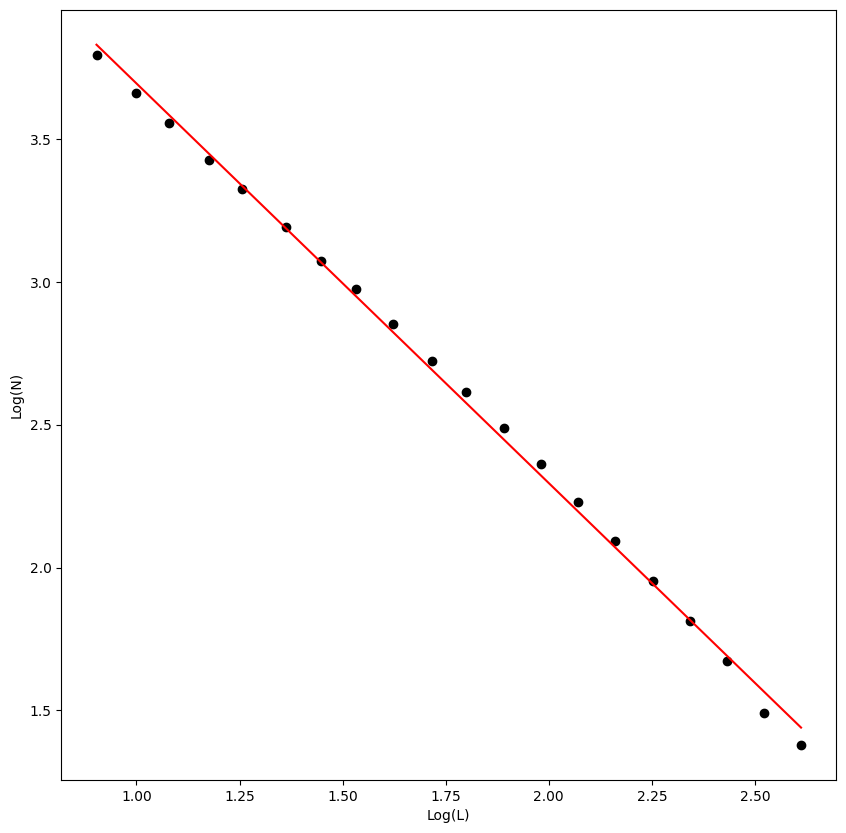

In [27]:
from NNIS import network, neuron, soma, dendrite
from NNIS.data_processing import generate_network


neuron_params = {
    'depth': 4,
    'mean_soma_radius': 60,
    'std_soma_radius': 15,
    'D': 1.5,
    'branch_angle': np.pi / 4,
    'mean_branches': 1.5,
    'weave_type': 'Gauss',
    'randomness': 0.2,
    'curviness': 'Gauss',
    'curviness_magnitude': 1.5,
    'n_primary_dendrites': 5,
}

network_params = {
    'width': 2048,
    'height': 2048,
    'num_neurons': 10,
}

testnet = generate_network(network_id = 'nntest', neuron_params=neuron_params, network_params=network_params)

net_mask = testnet.generate_binary_mask()
no_soma = np.zeros_like(net_mask)

for neuron in testnet.neurons:
    no_soma += neuron.dendrite_mask
    np.clip(no_soma, min=0, max=1)

plt.imshow(no_soma, 'gray')
plt.axis('off');

#measure_D(net_mask, min_size=8, max_size= np.shape(net_mask)[0]//5, n_sizes=20, invert=False, plot_image= True);
measure_D(no_soma, min_size=8, max_size= np.shape(net_mask)[0]//5, n_sizes=20, invert=False, plot_image= True);


np.unique(net_mask)